<a href="https://colab.research.google.com/github/ramya1807/Hospital-Playlist/blob/main/Data_Modeling_for_01_Dec_Meeting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

#and then to cd to any directory in the Google drive:
import os
os.chdir("drive/My Drive/CDS 2021")
#and to list all items in the directory that Colab is working on (to make sure it's the right dir):

!ls

Mounted at /content/drive
'(1) Dataset and Collection.ipynb'
'(2) Data pre-processing'
'(3) Problem and Algorithm Model'
'(4) Evaluation Methodology'
'(5) Results and Discussion'
'CDS Midterm Proposal.pdf'
 data_cleaned2.csv
 data_cleaned.csv
'data only'
 data_withgenre.csv
 genre.csv
'GPU setup'
 lin-reg.ipynb
 literature
 master_new.csv
 master_spotify.csv
'Meeting Notes.gdoc'
'music and mental health GitHub repo'
'Project Description.pdf'
'Proposal Presentation Script and Outline.gdoc'
'Results of Modelling.gsheet'
 songs_list.csv
'songs mp3'


In [3]:
data = pd.read_csv('data_withgenre.csv')
data

,gender,age,amount_music,life_enjoyment,resilience,balanced_life,emotional_flex,self_actualization,trauma,total_health,health_categorical,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,progressivetrance,anthemworship,christianmusic,popquebecois,earlymusic,talentshow,miamihiphop,basstrap,redneck,shimmerpop,ccm,electronictrap,deephouse,melodicmetalcore,canadianrock,compositionalambient,pixie,tropical,folkrock,canadianmetal,skatepunk,...,technicaldeathmetal,alternativehiphop,newromantic,southernrock,australianhiphop,melodicrap,mississippihiphop,escaperoom,upliftingtrance,undergroundhiphop,skarevival,dancehall,lilith,germanpoprock,strut,stompandholler,protopunk,boyband,shimmerpsych,hindihiphop,britishinvasion,peruvianrock,chicagorap,anti-folk,tracestep,softrock,gangsterrap,gothicmetal,cubaton,norwegianmetal,vaporsoul,alternativer&b,punkblues,chillwave,newwave,garagerock,latinpop,slowcore,britishsoul,trance
0,1,1,1,4,3,5,3,6,0,21,1.0,0.641,0.820,0.1020,0.395,117.974,0.000051,0.0662,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,6,6,3,5,5,0,25,1.0,0.547,0.752,0.1070,0.161,111.962,0.000249,0.1130,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,6,6,3,5,5,0,25,1.0,0.655,0.526,0.1160,0.156,121.127,0.000000,0.0566,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,5,5,4,4,5,0,23,1.0,0.774,0.692,0.1410,0.771,128.033,0.000010,0.0149,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,2,3,6,5,5,5,0,24,1.0,0.516,0.631,0.2640,0.254,143.777,0.000000,0.7380,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,0,1,2,0,3,3,1,1,0,8,0.0,0.560,0.853,0.0944,0.860,134.066,0.000000,0.0130,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547,0,1,2,0,3,3,1,1,0,8,0.0,0.851,0.621,0.8870,0.449,90.940,0.000014,0.0202,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
548,1,1,2,5,5,5,6,6,1,27,1.0,0.313,0.603,0.1840,0.817,99.172,0.000045,0.2480,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
549,1,1,2,5,5,5,6,6,1,27,1.0,0.442,0.574,0.1890,0.467,86.430,0.002900,0.1900,40.0,0.0,0.0,0.0,0.0,0.

In [4]:
data.columns

Index(['gender', 'age', 'amount_music', 'life_enjoyment', 'resilience',
       'balanced_life', 'emotional_flex', 'self_actualization', 'trauma',
       'total_health',
       ...
       'vaporsoul', 'alternativer&b', 'punkblues', 'chillwave', 'newwave',
       'garagerock', 'latinpop', 'slowcore', 'britishsoul', 'trance'],
      dtype='object', length=406)

In [9]:
data['genres'] = 0
data['genres']

0      0
1      0
2      0
3      0
4      0
      ..
546    0
547    0
548    0
549    0
550    0
Name: genres, Length: 551, dtype: int64

# Data Preprocessing via Pipeline
* standardScaler()
* PCA()
* FunctionTransformer
* Normalizer


In [6]:
#from sklearn.pipeline import Pipeline


#from sklearn.decomposition import PCA
#from sklearn.preprocessing import FunctionTransformer
 
#pipeline = Pipeline([('pca', PCA()), ('fselect', FunctionTransformer(all_but_first_column))])



# To Model
* Decision Trees
  * Predict trauma 
  * Predict specific mental health indicators 
      * Don’t use other mental health indicators as predictors
* Ensemble Classifier
  * Predict trauma 
  * Predict specific mental health indicators 
      * Don’t use other mental health indicators as predictors
* Ridge Regression
  * Predict trauma 
      * Don’t use other mental health indicators as predictors
  * Predict specific mental health indicators 
      * Don’t use other mental health indicators as predictors
* Lasso Regression
  * Predict trauma 
      * Don’t use other mental health indicators as predictors
  * Predict specific mental health indicators 
      * Don’t use other mental health indicators as predictors

## Decision Trees

In [7]:
data.columns

Index(['gender', 'age', 'amount_music', 'life_enjoyment', 'resilience',
       'balanced_life', 'emotional_flex', 'self_actualization', 'trauma',
       'total_health',
       ...
       'vaporsoul', 'alternativer&b', 'punkblues', 'chillwave', 'newwave',
       'garagerock', 'latinpop', 'slowcore', 'britishsoul', 'trance'],
      dtype='object', length=406)

### Predict trauma

#### Standard Scaler

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
              precision    recall  f1-score   support

           0       0.63      0.99      0.77       104
           1       0.67      0.03      0.06        62

    accuracy                           0.63       166
   macro avg       0.65      0.51      0.42       166
weighted avg       0.64      0.63      0.51       166

Confusion Matrix: 
 [[103   1]
 [ 60   2]]


[Text(186.0, 190.26, 'X[5] <= 0.897\ngini = 0.479\nsamples = 385\nvalue = [232, 153]'),
 Text(111.60000000000001, 135.9, 'X[3] <= 0.928\ngini = 0.474\nsamples = 374\nvalue = [230, 144]'),
 Text(74.4, 81.53999999999999, 'X[0] <= 0.912\ngini = 0.47\nsamples = 369\nvalue = [230, 139]'),
 Text(37.2, 27.180000000000007, 'gini = 0.48\nsamples = 338\nvalue = [203, 135]'),
 Text(111.60000000000001, 27.180000000000007, 'gini = 0.225\nsamples = 31\nvalue = [27, 4]'),
 Text(148.8, 81.53999999999999, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(260.40000000000003, 135.9, 'X[385] <= 0.5\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(223.20000000000002, 81.53999999999999, 'X[0] <= 0.482\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(186.0, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(260.40000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(297.6, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

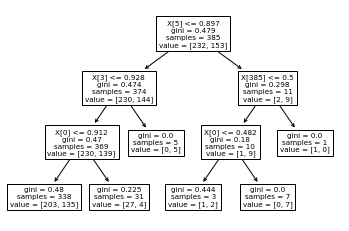

In [10]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['trauma', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['trauma'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler

# define a new scaler: 
x_scaler = StandardScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_1 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_1.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

def evaluate_on_training_set(y_test, y_pred):  
  # print out recall and precision
  print(classification_report(y_test, y_pred))
  
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


y_pred = model_1.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_1)

#### PCA (undone)

#### MinMax Scaler

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
              precision    recall  f1-score   support

           0       0.63      0.99      0.77       104
           1       0.67      0.03      0.06        62

    accuracy                           0.63       166
   macro avg       0.65      0.51      0.42       166
weighted avg       0.64      0.63      0.51       166

Confusion Matrix: 
 [[103   1]
 [ 60   2]]


[Text(186.0, 190.26, 'X[5] <= 0.897\ngini = 0.479\nsamples = 385\nvalue = [232, 153]'),
 Text(111.60000000000001, 135.9, 'X[3] <= 0.928\ngini = 0.474\nsamples = 374\nvalue = [230, 144]'),
 Text(74.4, 81.53999999999999, 'X[0] <= 0.912\ngini = 0.47\nsamples = 369\nvalue = [230, 139]'),
 Text(37.2, 27.180000000000007, 'gini = 0.48\nsamples = 338\nvalue = [203, 135]'),
 Text(111.60000000000001, 27.180000000000007, 'gini = 0.225\nsamples = 31\nvalue = [27, 4]'),
 Text(148.8, 81.53999999999999, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(260.40000000000003, 135.9, 'X[265] <= 0.5\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(223.20000000000002, 81.53999999999999, 'X[5] <= 0.912\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(186.0, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(260.40000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(297.6, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

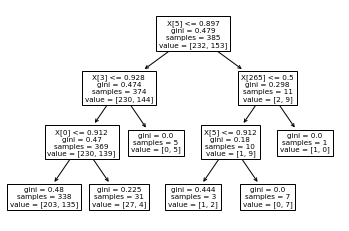

In [11]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['trauma', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['trauma'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_3 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_3.fit(X_train, y_train)


y_pred = model_3.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_3)

#### Function Transformer

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
              precision    recall  f1-score   support

           0       0.63      0.99      0.77       104
           1       0.67      0.03      0.06        62

    accuracy                           0.63       166
   macro avg       0.65      0.51      0.42       166
weighted avg       0.64      0.63      0.51       166

Confusion Matrix: 
 [[103   1]
 [ 60   2]]


[Text(186.0, 190.26, 'X[5] <= 0.897\ngini = 0.479\nsamples = 385\nvalue = [232, 153]'),
 Text(111.60000000000001, 135.9, 'X[3] <= 0.928\ngini = 0.474\nsamples = 374\nvalue = [230, 144]'),
 Text(74.4, 81.53999999999999, 'X[0] <= 0.912\ngini = 0.47\nsamples = 369\nvalue = [230, 139]'),
 Text(37.2, 27.180000000000007, 'gini = 0.48\nsamples = 338\nvalue = [203, 135]'),
 Text(111.60000000000001, 27.180000000000007, 'gini = 0.225\nsamples = 31\nvalue = [27, 4]'),
 Text(148.8, 81.53999999999999, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(260.40000000000003, 135.9, 'X[265] <= 0.5\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(223.20000000000002, 81.53999999999999, 'X[3] <= 0.56\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(186.0, 27.180000000000007, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(260.40000000000003, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(297.6, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

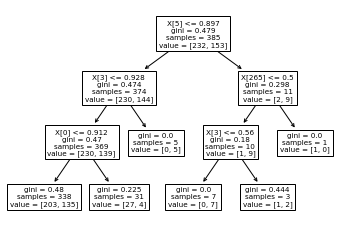

In [12]:
from sklearn.preprocessing import FunctionTransformer
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['trauma', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['trauma'], # y to be predicted
            test_size=0.3,
            random_state=0) 

# define a new scaler: 
x_scaler = FunctionTransformer()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_4 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_4.fit(X_train, y_train)


y_pred = model_4.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_4)

### Predict specific mental health indicators

In [13]:
data.columns

Index(['gender', 'age', 'amount_music', 'life_enjoyment', 'resilience',
       'balanced_life', 'emotional_flex', 'self_actualization', 'trauma',
       'total_health',
       ...
       'alternativer&b', 'punkblues', 'chillwave', 'newwave', 'garagerock',
       'latinpop', 'slowcore', 'britishsoul', 'trance', 'genres'],
      dtype='object', length=407)

#### Life Enjoyment

##### Standard Scaler

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4
 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3
 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 4 4 4 3 3 3 4 3 3 4 3 3
 3 4 3 3 3 3 3 3 4 3 4 4 4 3 3 3 4 3]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        28
           3       0.29      0.90      0.44        48
           4       0.20      0.11      0.14        36
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        12

    accuracy                           0.28       166
   macro avg       0.07      0.14      0.08       166
weighted avg       0.13      0.28      0.16       166

Confusion Matrix: 
 [[ 0  0  0  4  1  0  0]
 [ 0  0  0 10  1  0  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(223.20000000000002, 190.26, 'X[294] <= 0.5\ngini = 0.799\nsamples = 385\nvalue = [14, 24, 60, 106, 98, 66, 17]'),
 Text(167.4, 135.9, 'X[391] <= 0.5\ngini = 0.798\nsamples = 381\nvalue = [14, 24, 56, 106, 98, 66, 17]'),
 Text(111.60000000000001, 81.53999999999999, 'X[3] <= 0.701\ngini = 0.799\nsamples = 376\nvalue = [14, 24, 56, 106, 93, 66, 17]'),
 Text(55.800000000000004, 27.180000000000007, 'gini = 0.793\nsamples = 311\nvalue = [12, 18, 47, 97, 70, 53, 14]'),
 Text(167.4, 27.180000000000007, 'gini = 0.785\nsamples = 65\nvalue = [2, 6, 9, 9, 23, 13, 3]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 0, 5, 0, 0]'),
 Text(279.0, 135.9, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0, 0, 0, 0]')]

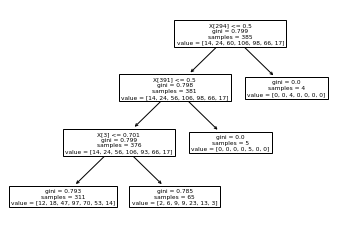

In [14]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['life_enjoyment', # y
             'gender', 
             'age', 
             'amount_music',
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'trauma',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['life_enjoyment'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler

# define a new scaler: 
x_scaler = StandardScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_5 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_5.fit(X_train, y_train)


y_pred = model_5.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_5)

##### MinMax Scaler

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4
 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3
 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 4 4 4 3 3 3 4 3 3 4 3 3
 3 4 3 3 3 3 3 3 4 3 4 4 4 3 3 3 4 3]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        28
           3       0.29      0.90      0.44        48
           4       0.20      0.11      0.14        36
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        12

    accuracy                           0.28       166
   macro avg       0.07      0.14      0.08       166
weighted avg       0.13      0.28      0.16       166

Confusion Matrix: 
 [[ 0  0  0  4  1  0  0]
 [ 0  0  0 10  1  0  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(223.20000000000002, 190.26, 'X[294] <= 0.5\ngini = 0.799\nsamples = 385\nvalue = [14, 24, 60, 106, 98, 66, 17]'),
 Text(167.4, 135.9, 'X[391] <= 0.5\ngini = 0.798\nsamples = 381\nvalue = [14, 24, 56, 106, 98, 66, 17]'),
 Text(111.60000000000001, 81.53999999999999, 'X[3] <= 0.701\ngini = 0.799\nsamples = 376\nvalue = [14, 24, 56, 106, 93, 66, 17]'),
 Text(55.800000000000004, 27.180000000000007, 'gini = 0.793\nsamples = 311\nvalue = [12, 18, 47, 97, 70, 53, 14]'),
 Text(167.4, 27.180000000000007, 'gini = 0.785\nsamples = 65\nvalue = [2, 6, 9, 9, 23, 13, 3]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 0, 5, 0, 0]'),
 Text(279.0, 135.9, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0, 0, 0, 0]')]

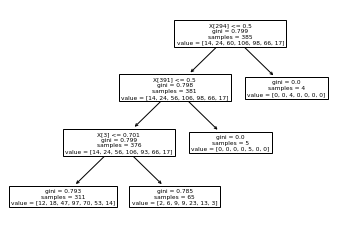

In [15]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['life_enjoyment', # y
             'gender', 
             'age', 
             'amount_music',
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'trauma',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['life_enjoyment'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_6 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_6.fit(X_train, y_train)


y_pred = model_6.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_6)

##### Function Transformer

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4
 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3
 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 4 4 4 3 3 3 4 3 3 4 3 3
 3 4 3 3 3 3 3 3 4 3 4 4 4 3 3 3 4 3]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        28
           3       0.29      0.90      0.44        48
           4       0.20      0.11      0.14        36
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        12

    accuracy                           0.28       166
   macro avg       0.07      0.14      0.08       166
weighted avg       0.13      0.28      0.16       166

Confusion Matrix: 
 [[ 0  0  0  4  1  0  0]
 [ 0  0  0 10  1  0  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(223.20000000000002, 190.26, 'X[294] <= 0.5\ngini = 0.799\nsamples = 385\nvalue = [14, 24, 60, 106, 98, 66, 17]'),
 Text(167.4, 135.9, 'X[391] <= 0.5\ngini = 0.798\nsamples = 381\nvalue = [14, 24, 56, 106, 98, 66, 17]'),
 Text(111.60000000000001, 81.53999999999999, 'X[3] <= 0.701\ngini = 0.799\nsamples = 376\nvalue = [14, 24, 56, 106, 93, 66, 17]'),
 Text(55.800000000000004, 27.180000000000007, 'gini = 0.793\nsamples = 311\nvalue = [12, 18, 47, 97, 70, 53, 14]'),
 Text(167.4, 27.180000000000007, 'gini = 0.785\nsamples = 65\nvalue = [2, 6, 9, 9, 23, 13, 3]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 0, 5, 0, 0]'),
 Text(279.0, 135.9, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0, 0, 0, 0]')]

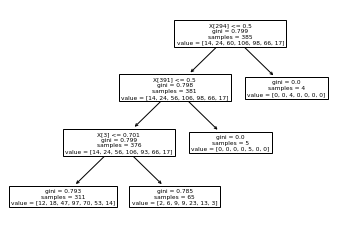

In [16]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['life_enjoyment', # y
             'gender', 
             'age', 
             'amount_music',
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'trauma',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['life_enjoyment'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer

# define a new scaler: 
x_scaler = FunctionTransformer()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_7 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_7.fit(X_train, y_train)


y_pred = model_7.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_7)

#### Resilience

##### Standard Scaler

[4 4 4 4 5 4 2 5 5 4 4 5 4 4 5 4 4 4 5 4 5 4 2 5 4 4 5 4 5 5 4 2 4 4 5 4 4
 4 4 2 4 4 2 5 2 2 5 5 4 4 4 4 4 4 4 5 4 5 4 4 4 5 4 5 4 5 4 5 4 5 5 2 4 4
 5 4 5 4 4 4 2 5 4 4 4 5 4 5 4 4 2 4 4 2 5 4 5 4 2 5 5 4 4 5 5 5 5 5 4 5 4
 4 4 4 2 5 5 5 4 5 4 4 4 5 2 5 4 5 4 4 4 5 4 5 5 4 4 4 5 5 4 5 4 4 4 4 4 4
 5 4 4 4 4 4 4 2 4 4 4 4 4 2 5 5 4 4]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.19      0.17      0.18        18
           3       0.00      0.00      0.00        23
           4       0.30      0.62      0.41        47
           5       0.46      0.51      0.49        49
           6       0.00      0.00      0.00        26

    accuracy                           0.34       166
   macro avg       0.14      0.18      0.15       166
weighted avg       0.24      0.34      0.28       166

Confusion Matrix: 
 [[ 0  0  0  0  0  1  0]
 [ 0  0  0  0  2  0  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(209.25, 190.26, 'X[146] <= 0.5\ngini = 0.786\nsamples = 385\nvalue = [5, 11, 46, 74, 119, 91, 39]'),
 Text(167.4, 135.9, 'X[5] <= 0.0\ngini = 0.784\nsamples = 381\nvalue = [5, 11, 42, 74, 119, 91, 39]'),
 Text(83.7, 81.53999999999999, 'X[3] <= 0.134\ngini = 0.767\nsamples = 254\nvalue = [2, 4, 25, 48, 92, 51, 32]'),
 Text(41.85, 27.180000000000007, 'gini = 0.651\nsamples = 13\nvalue = [0, 0, 7, 2, 1, 1, 2]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.757\nsamples = 241\nvalue = [2, 4, 18, 46, 91, 50, 30]'),
 Text(251.10000000000002, 81.53999999999999, 'X[1] <= 0.715\ngini = 0.789\nsamples = 127\nvalue = [3, 7, 17, 26, 27, 40, 7]'),
 Text(209.25, 27.180000000000007, 'gini = 0.764\nsamples = 106\nvalue = [1, 4, 9, 23, 26, 36, 7]'),
 Text(292.95, 27.180000000000007, 'gini = 0.766\nsamples = 21\nvalue = [2, 3, 8, 3, 1, 4, 0]'),
 Text(251.10000000000002, 135.9, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0, 0, 0, 0]')]

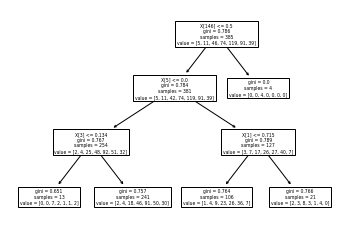

In [17]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'trauma',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['resilience'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler

# define a new scaler: 
x_scaler = StandardScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_8 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_8.fit(X_train, y_train)


y_pred = model_8.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_8)

##### MinMax Scaler

[4 4 4 4 5 4 2 5 5 4 4 5 4 4 5 4 4 4 5 4 5 4 2 5 4 4 5 4 5 5 4 2 4 4 5 4 4
 4 4 2 4 4 2 5 2 2 5 5 4 4 4 4 4 4 4 5 4 5 4 4 4 5 4 5 4 5 4 5 4 5 5 2 4 4
 5 4 5 4 4 4 2 5 4 4 4 5 4 5 4 4 2 4 4 2 5 4 5 4 2 5 5 4 4 5 5 5 5 5 4 5 4
 4 4 4 2 5 5 5 4 5 4 4 4 5 2 5 4 5 4 4 4 5 4 5 5 4 4 4 5 5 4 5 4 4 4 4 4 4
 5 4 4 4 4 4 4 2 4 4 4 4 4 2 5 5 4 4]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.19      0.17      0.18        18
           3       0.00      0.00      0.00        23
           4       0.30      0.62      0.41        47
           5       0.46      0.51      0.49        49
           6       0.00      0.00      0.00        26

    accuracy                           0.34       166
   macro avg       0.14      0.18      0.15       166
weighted avg       0.24      0.34      0.28       166

Confusion Matrix: 
 [[ 0  0  0  0  0  1  0]
 [ 0  0  0  0  2  0  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(209.25, 190.26, 'X[146] <= 0.5\ngini = 0.786\nsamples = 385\nvalue = [5, 11, 46, 74, 119, 91, 39]'),
 Text(167.4, 135.9, 'X[5] <= 0.0\ngini = 0.784\nsamples = 381\nvalue = [5, 11, 42, 74, 119, 91, 39]'),
 Text(83.7, 81.53999999999999, 'X[3] <= 0.134\ngini = 0.767\nsamples = 254\nvalue = [2, 4, 25, 48, 92, 51, 32]'),
 Text(41.85, 27.180000000000007, 'gini = 0.651\nsamples = 13\nvalue = [0, 0, 7, 2, 1, 1, 2]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.757\nsamples = 241\nvalue = [2, 4, 18, 46, 91, 50, 30]'),
 Text(251.10000000000002, 81.53999999999999, 'X[1] <= 0.715\ngini = 0.789\nsamples = 127\nvalue = [3, 7, 17, 26, 27, 40, 7]'),
 Text(209.25, 27.180000000000007, 'gini = 0.764\nsamples = 106\nvalue = [1, 4, 9, 23, 26, 36, 7]'),
 Text(292.95, 27.180000000000007, 'gini = 0.766\nsamples = 21\nvalue = [2, 3, 8, 3, 1, 4, 0]'),
 Text(251.10000000000002, 135.9, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0, 0, 0, 0]')]

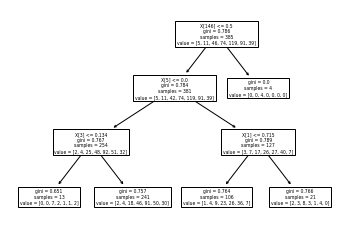

In [18]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'trauma',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['resilience'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_9 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_9.fit(X_train, y_train)


y_pred = model_9.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_9)

##### Function Transformer

[4 4 4 4 5 4 2 5 5 4 4 5 4 4 5 4 4 4 5 4 5 4 2 5 4 4 5 4 5 5 4 2 4 4 5 4 4
 4 4 2 4 4 2 5 2 2 5 5 4 4 4 4 4 4 4 5 4 5 4 4 4 5 4 5 4 5 4 5 4 5 5 2 4 4
 5 4 5 4 4 4 2 5 4 4 4 5 4 5 4 4 2 4 4 2 5 4 5 4 2 5 5 4 4 5 5 5 5 5 4 5 4
 4 4 4 2 5 5 5 4 5 4 4 4 5 2 5 4 5 4 4 4 5 4 5 5 4 4 4 5 5 4 5 4 4 4 4 4 4
 5 4 4 4 4 4 4 2 4 4 4 4 4 2 5 5 4 4]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.19      0.17      0.18        18
           3       0.00      0.00      0.00        23
           4       0.30      0.62      0.41        47
           5       0.46      0.51      0.49        49
           6       0.00      0.00      0.00        26

    accuracy                           0.34       166
   macro avg       0.14      0.18      0.15       166
weighted avg       0.24      0.34      0.28       166

Confusion Matrix: 
 [[ 0  0  0  0  0  1  0]
 [ 0  0  0  0  2  0  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(209.25, 190.26, 'X[146] <= 0.5\ngini = 0.786\nsamples = 385\nvalue = [5, 11, 46, 74, 119, 91, 39]'),
 Text(167.4, 135.9, 'X[5] <= 0.0\ngini = 0.784\nsamples = 381\nvalue = [5, 11, 42, 74, 119, 91, 39]'),
 Text(83.7, 81.53999999999999, 'X[3] <= 0.134\ngini = 0.767\nsamples = 254\nvalue = [2, 4, 25, 48, 92, 51, 32]'),
 Text(41.85, 27.180000000000007, 'gini = 0.651\nsamples = 13\nvalue = [0, 0, 7, 2, 1, 1, 2]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.757\nsamples = 241\nvalue = [2, 4, 18, 46, 91, 50, 30]'),
 Text(251.10000000000002, 81.53999999999999, 'X[1] <= 0.715\ngini = 0.789\nsamples = 127\nvalue = [3, 7, 17, 26, 27, 40, 7]'),
 Text(209.25, 27.180000000000007, 'gini = 0.764\nsamples = 106\nvalue = [1, 4, 9, 23, 26, 36, 7]'),
 Text(292.95, 27.180000000000007, 'gini = 0.766\nsamples = 21\nvalue = [2, 3, 8, 3, 1, 4, 0]'),
 Text(251.10000000000002, 135.9, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0, 0, 0, 0]')]

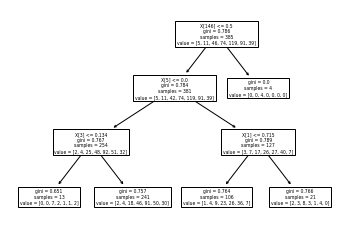

In [19]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'trauma',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['resilience'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer

# define a new scaler: 
x_scaler = FunctionTransformer()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_10 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_10.fit(X_train, y_train)


y_pred = model_10.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_10)

#### Balanced Life

##### Standard Scaler

[3 5 5 2 3 4 2 4 3 4 3 4 3 3 3 3 2 4 5 2 4 4 3 3 3 3 2 3 4 5 3 3 3 4 3 3 3
 3 4 3 4 5 4 3 3 3 3 2 3 5 3 3 4 3 4 4 3 3 3 3 3 3 3 4 5 3 2 4 4 3 3 4 3 5
 3 3 3 3 3 3 3 3 5 3 4 4 5 3 4 5 3 3 4 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 2 3
 3 5 3 3 4 4 4 5 4 3 3 4 3 2 3 3 3 3 4 3 3 3 2 5 3 3 4 3 3 3 3 3 3 3 5 3 4
 3 3 5 3 3 3 3 5 3 3 3 3 5 4 3 2 3 3]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         6
           2       0.09      0.03      0.04        36
           3       0.24      0.69      0.36        36
           4       0.21      0.22      0.22        32
           5       0.28      0.13      0.18        38
           6       0.00      0.00      0.00        16

    accuracy                           0.23       166
   macro avg       0.12      0.15      0.11       166
weighted avg       0.18      0.23      0.17       166

Confusion Matrix: 
 [[ 0  0  1  0  1  0  0]
 [ 0  0  2  2  0  2  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(167.4, 190.26, 'X[4] <= 93.007\ngini = 0.798\nsamples = 385\nvalue = [4, 16, 83, 76, 103, 75, 28]'),
 Text(83.7, 135.9, 'X[7] <= 52.5\ngini = 0.713\nsamples = 65\nvalue = [1, 2, 14, 11, 29, 7, 1]'),
 Text(41.85, 81.53999999999999, 'X[3] <= 0.87\ngini = 0.676\nsamples = 19\nvalue = [0, 1, 8, 1, 7, 1, 1]'),
 Text(20.925, 27.180000000000007, 'gini = 0.672\nsamples = 16\nvalue = [0, 1, 8, 1, 4, 1, 1]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3, 0, 0]'),
 Text(125.55000000000001, 81.53999999999999, 'X[3] <= 0.633\ngini = 0.689\nsamples = 46\nvalue = [1, 1, 6, 10, 22, 6, 0]'),
 Text(104.625, 27.180000000000007, 'gini = 0.73\nsamples = 36\nvalue = [1, 1, 4, 10, 14, 6, 0]'),
 Text(146.475, 27.180000000000007, 'gini = 0.32\nsamples = 10\nvalue = [0, 0, 2, 0, 8, 0, 0]'),
 Text(251.10000000000002, 135.9, 'X[4] <= 105.039\ngini = 0.804\nsamples = 320\nvalue = [3, 14, 69, 65, 74, 68, 27]'),
 Text(209.25, 81.53999999999999, 'X[5] <= 0.001\n

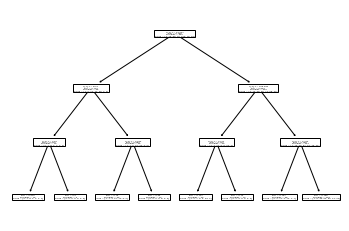

In [20]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['balanced_life', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'emotional_flex', 
             'self_actualization',
             'trauma',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['balanced_life'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler

# define a new scaler: 
x_scaler = StandardScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_11 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_11.fit(X_train, y_train)


y_pred = model_11.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_11)

##### MinMax Scaler

[3 5 5 2 3 4 2 4 3 4 3 4 3 3 3 3 2 4 5 2 4 4 3 3 3 3 2 3 4 5 3 3 3 4 3 3 3
 3 4 3 4 5 4 3 3 3 3 2 3 5 3 3 4 3 4 4 3 3 3 3 3 3 3 4 5 3 2 4 4 3 3 4 3 5
 3 3 3 3 3 3 3 3 5 3 4 4 5 3 4 5 3 3 4 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 4 3
 3 5 3 3 4 4 4 5 4 3 3 4 3 2 3 3 3 3 4 3 3 3 2 5 3 3 4 3 3 3 3 3 3 3 5 3 4
 3 3 5 3 3 3 3 5 3 3 3 3 5 4 3 2 3 3]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         6
           2       0.10      0.03      0.04        36
           3       0.24      0.69      0.36        36
           4       0.21      0.22      0.21        32
           5       0.28      0.13      0.18        38
           6       0.00      0.00      0.00        16

    accuracy                           0.23       166
   macro avg       0.12      0.15      0.11       166
weighted avg       0.18      0.23      0.17       166

Confusion Matrix: 
 [[ 0  0  1  0  1  0  0]
 [ 0  0  2  2  0  2  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(167.4, 190.26, 'X[4] <= 93.007\ngini = 0.798\nsamples = 385\nvalue = [4, 16, 83, 76, 103, 75, 28]'),
 Text(83.7, 135.9, 'X[7] <= 52.5\ngini = 0.713\nsamples = 65\nvalue = [1, 2, 14, 11, 29, 7, 1]'),
 Text(41.85, 81.53999999999999, 'X[5] <= 0.018\ngini = 0.676\nsamples = 19\nvalue = [0, 1, 8, 1, 7, 1, 1]'),
 Text(20.925, 27.180000000000007, 'gini = 0.672\nsamples = 16\nvalue = [0, 1, 8, 1, 4, 1, 1]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3, 0, 0]'),
 Text(125.55000000000001, 81.53999999999999, 'X[3] <= 0.633\ngini = 0.689\nsamples = 46\nvalue = [1, 1, 6, 10, 22, 6, 0]'),
 Text(104.625, 27.180000000000007, 'gini = 0.73\nsamples = 36\nvalue = [1, 1, 4, 10, 14, 6, 0]'),
 Text(146.475, 27.180000000000007, 'gini = 0.32\nsamples = 10\nvalue = [0, 0, 2, 0, 8, 0, 0]'),
 Text(251.10000000000002, 135.9, 'X[4] <= 105.039\ngini = 0.804\nsamples = 320\nvalue = [3, 14, 69, 65, 74, 68, 27]'),
 Text(209.25, 81.53999999999999, 'X[5] <= 0.001\

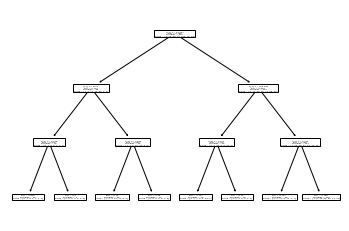

In [21]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['balanced_life', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'emotional_flex', 
             'self_actualization',
             'trauma',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['balanced_life'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_12 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_12.fit(X_train, y_train)


y_pred = model_12.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_12)

##### Function Transformer

[3 5 5 2 3 4 2 4 3 4 3 4 3 3 3 3 2 4 5 2 4 4 3 3 3 3 2 3 4 5 3 3 3 4 3 3 3
 3 4 3 4 5 4 3 3 3 3 2 3 5 3 3 4 3 4 4 3 3 3 3 3 3 3 4 5 3 2 4 4 3 3 4 3 5
 3 3 3 3 3 3 3 3 5 3 4 4 5 3 4 5 3 3 4 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 4 3
 3 5 3 3 4 4 4 5 4 3 3 4 3 2 3 3 3 3 4 3 3 3 2 5 3 3 4 3 3 3 3 3 3 3 5 3 4
 3 3 5 3 3 3 3 5 3 3 3 3 5 4 3 2 3 3]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         6
           2       0.10      0.03      0.04        36
           3       0.24      0.69      0.36        36
           4       0.21      0.22      0.21        32
           5       0.28      0.13      0.18        38
           6       0.00      0.00      0.00        16

    accuracy                           0.23       166
   macro avg       0.12      0.15      0.11       166
weighted avg       0.18      0.23      0.17       166

Confusion Matrix: 
 [[ 0  0  1  0  1  0  0]
 [ 0  0  2  2  0  2  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(167.4, 190.26, 'X[4] <= 93.007\ngini = 0.798\nsamples = 385\nvalue = [4, 16, 83, 76, 103, 75, 28]'),
 Text(83.7, 135.9, 'X[7] <= 52.5\ngini = 0.713\nsamples = 65\nvalue = [1, 2, 14, 11, 29, 7, 1]'),
 Text(41.85, 81.53999999999999, 'X[5] <= 0.018\ngini = 0.676\nsamples = 19\nvalue = [0, 1, 8, 1, 7, 1, 1]'),
 Text(20.925, 27.180000000000007, 'gini = 0.672\nsamples = 16\nvalue = [0, 1, 8, 1, 4, 1, 1]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3, 0, 0]'),
 Text(125.55000000000001, 81.53999999999999, 'X[3] <= 0.633\ngini = 0.689\nsamples = 46\nvalue = [1, 1, 6, 10, 22, 6, 0]'),
 Text(104.625, 27.180000000000007, 'gini = 0.73\nsamples = 36\nvalue = [1, 1, 4, 10, 14, 6, 0]'),
 Text(146.475, 27.180000000000007, 'gini = 0.32\nsamples = 10\nvalue = [0, 0, 2, 0, 8, 0, 0]'),
 Text(251.10000000000002, 135.9, 'X[4] <= 105.039\ngini = 0.804\nsamples = 320\nvalue = [3, 14, 69, 65, 74, 68, 27]'),
 Text(209.25, 81.53999999999999, 'X[5] <= 0.001\

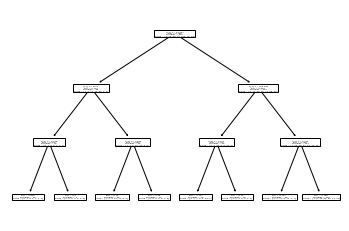

In [22]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['balanced_life', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'emotional_flex', 
             'self_actualization',
             'trauma',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['balanced_life'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer

# define a new scaler: 
x_scaler = FunctionTransformer()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_13 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_13.fit(X_train, y_train)


y_pred = model_13.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_13)

#### Emotional Flexibility

##### Standard Scaler

[4 4 4 4 4 5 4 4 4 4 4 5 5 4 4 3 4 4 4 4 5 5 5 4 5 4 4 4 5 4 5 2 5 5 5 4 5
 4 5 4 4 4 5 4 4 4 4 4 4 5 5 5 4 5 5 4 5 5 5 5 4 4 5 4 4 4 4 4 5 5 5 4 4 4
 5 4 4 4 5 5 4 4 4 4 4 4 4 5 5 4 5 4 4 5 4 4 5 4 5 4 4 4 5 5 4 5 4 5 5 4 4
 4 4 4 4 5 4 5 4 4 5 5 5 4 4 4 4 4 4 5 5 4 4 5 5 5 4 5 4 4 4 4 4 4 3 4 4 4
 4 5 4 4 4 5 4 4 5 5 5 4 4 4 5 4 5 5]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        11
           2       1.00      0.04      0.07        28
           3       0.00      0.00      0.00        24
           4       0.29      0.79      0.43        38
           5       0.31      0.53      0.39        36
           6       0.00      0.00      0.00        24

    accuracy                           0.30       166
   macro avg       0.23      0.19      0.13       166
weighted avg       0.30      0.30      0.19       166

Confusion Matrix: 
 [[ 0  0  0  0  4  1  0]
 [ 0  0  0  0  7  4  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(209.25, 190.26, 'X[146] <= 0.5\ngini = 0.805\nsamples = 385\nvalue = [15, 19, 60, 71, 100, 95, 25]'),
 Text(167.4, 135.9, 'X[179] <= 0.5\ngini = 0.804\nsamples = 381\nvalue = [15, 19, 56, 71, 100, 95, 25]'),
 Text(83.7, 81.53999999999999, 'X[4] <= 146.907\ngini = 0.801\nsamples = 296\nvalue = [13, 17, 44, 53, 88, 65, 16]'),
 Text(41.85, 27.180000000000007, 'gini = 0.799\nsamples = 252\nvalue = [10, 14, 40, 45, 80, 47, 16]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.749\nsamples = 44\nvalue = [3, 3, 4, 8, 8, 18, 0]'),
 Text(251.10000000000002, 81.53999999999999, 'X[4] <= 183.509\ngini = 0.778\nsamples = 85\nvalue = [2, 2, 12, 18, 12, 30, 9]'),
 Text(209.25, 27.180000000000007, 'gini = 0.773\nsamples = 80\nvalue = [2, 2, 12, 14, 11, 30, 9]'),
 Text(292.95, 27.180000000000007, 'gini = 0.32\nsamples = 5\nvalue = [0, 0, 0, 4, 1, 0, 0]'),
 Text(251.10000000000002, 135.9, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0, 0, 0, 0]')]

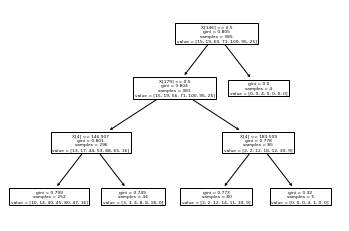

In [23]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['emotional_flex', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'self_actualization',
             'trauma',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['emotional_flex'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler

# define a new scaler: 
x_scaler = StandardScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_14 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_14.fit(X_train, y_train)


y_pred = model_14.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_14)

##### MinMax Scaler

[3 5 5 2 3 4 2 4 3 4 3 4 3 3 3 3 2 4 5 2 4 4 3 3 3 3 2 3 4 5 3 3 3 4 3 3 3
 3 4 3 4 5 4 3 3 3 3 2 3 5 3 3 4 3 4 4 3 3 3 3 3 3 3 4 5 3 2 4 4 3 3 4 3 5
 3 3 3 3 3 3 3 3 5 3 4 4 5 3 4 5 3 3 4 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 4 3
 3 5 3 3 4 4 4 5 4 3 3 4 3 2 3 3 3 3 4 3 3 3 2 5 3 3 4 3 3 3 3 3 3 3 5 3 4
 3 3 5 3 3 3 3 5 3 3 3 3 5 4 3 2 3 3]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         6
           2       0.10      0.03      0.04        36
           3       0.24      0.69      0.36        36
           4       0.21      0.22      0.21        32
           5       0.28      0.13      0.18        38
           6       0.00      0.00      0.00        16

    accuracy                           0.23       166
   macro avg       0.12      0.15      0.11       166
weighted avg       0.18      0.23      0.17       166

Confusion Matrix: 
 [[ 0  0  1  0  1  0  0]
 [ 0  0  2  2  0  2  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(167.4, 190.26, 'X[4] <= 93.007\ngini = 0.798\nsamples = 385\nvalue = [4, 16, 83, 76, 103, 75, 28]'),
 Text(83.7, 135.9, 'X[7] <= 52.5\ngini = 0.713\nsamples = 65\nvalue = [1, 2, 14, 11, 29, 7, 1]'),
 Text(41.85, 81.53999999999999, 'X[5] <= 0.018\ngini = 0.676\nsamples = 19\nvalue = [0, 1, 8, 1, 7, 1, 1]'),
 Text(20.925, 27.180000000000007, 'gini = 0.672\nsamples = 16\nvalue = [0, 1, 8, 1, 4, 1, 1]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3, 0, 0]'),
 Text(125.55000000000001, 81.53999999999999, 'X[3] <= 0.633\ngini = 0.689\nsamples = 46\nvalue = [1, 1, 6, 10, 22, 6, 0]'),
 Text(104.625, 27.180000000000007, 'gini = 0.73\nsamples = 36\nvalue = [1, 1, 4, 10, 14, 6, 0]'),
 Text(146.475, 27.180000000000007, 'gini = 0.32\nsamples = 10\nvalue = [0, 0, 2, 0, 8, 0, 0]'),
 Text(251.10000000000002, 135.9, 'X[4] <= 105.039\ngini = 0.804\nsamples = 320\nvalue = [3, 14, 69, 65, 74, 68, 27]'),
 Text(209.25, 81.53999999999999, 'X[5] <= 0.001\

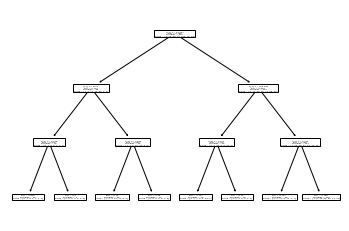

In [24]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['balanced_life', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'emotional_flex', 
             'self_actualization',
             'trauma',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['balanced_life'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_15 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_15.fit(X_train, y_train)


y_pred = model_15.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_15)

##### Function Transformer

[3 5 5 2 3 4 2 4 3 4 3 4 3 3 3 3 2 4 5 2 4 4 3 3 3 3 2 3 4 5 3 3 3 4 3 3 3
 3 4 3 4 5 4 3 3 3 3 2 3 5 3 3 4 3 4 4 3 3 3 3 3 3 3 4 5 3 2 4 4 3 3 4 3 5
 3 3 3 3 3 3 3 3 5 3 4 4 5 3 4 5 3 3 4 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 2 3
 3 5 3 3 4 4 4 5 4 3 3 4 3 2 3 3 3 3 4 3 3 3 2 5 3 3 4 3 3 3 3 3 3 3 5 3 4
 3 3 5 3 3 3 3 5 3 3 3 3 5 4 3 2 3 3]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         6
           2       0.09      0.03      0.04        36
           3       0.24      0.69      0.36        36
           4       0.21      0.22      0.22        32
           5       0.28      0.13      0.18        38
           6       0.00      0.00      0.00        16

    accuracy                           0.23       166
   macro avg       0.12      0.15      0.11       166
weighted avg       0.18      0.23      0.17       166

Confusion Matrix: 
 [[ 0  0  1  0  1  0  0]
 [ 0  0  2  2  0  2  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(167.4, 190.26, 'X[4] <= 93.007\ngini = 0.798\nsamples = 385\nvalue = [4, 16, 83, 76, 103, 75, 28]'),
 Text(83.7, 135.9, 'X[7] <= 52.5\ngini = 0.713\nsamples = 65\nvalue = [1, 2, 14, 11, 29, 7, 1]'),
 Text(41.85, 81.53999999999999, 'X[3] <= 0.87\ngini = 0.676\nsamples = 19\nvalue = [0, 1, 8, 1, 7, 1, 1]'),
 Text(20.925, 27.180000000000007, 'gini = 0.672\nsamples = 16\nvalue = [0, 1, 8, 1, 4, 1, 1]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3, 0, 0]'),
 Text(125.55000000000001, 81.53999999999999, 'X[3] <= 0.633\ngini = 0.689\nsamples = 46\nvalue = [1, 1, 6, 10, 22, 6, 0]'),
 Text(104.625, 27.180000000000007, 'gini = 0.73\nsamples = 36\nvalue = [1, 1, 4, 10, 14, 6, 0]'),
 Text(146.475, 27.180000000000007, 'gini = 0.32\nsamples = 10\nvalue = [0, 0, 2, 0, 8, 0, 0]'),
 Text(251.10000000000002, 135.9, 'X[4] <= 105.039\ngini = 0.804\nsamples = 320\nvalue = [3, 14, 69, 65, 74, 68, 27]'),
 Text(209.25, 81.53999999999999, 'X[5] <= 0.001\n

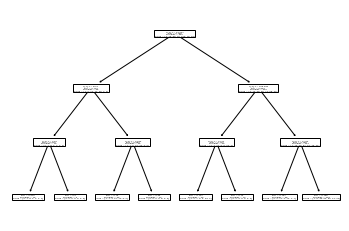

In [25]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['balanced_life', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'emotional_flex', 
             'self_actualization',
             'trauma',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['balanced_life'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer

# define a new scaler: 
x_scaler = FunctionTransformer()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_16 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_16.fit(X_train, y_train)


y_pred = model_16.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_16)

#### Self Actualization

##### Standard Scaler

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 5 5 5 5 5 5 5 5 5 5 6 5
 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        39
           5       0.29      0.98      0.44        47
           6       1.00      0.05      0.10        38

    accuracy                           0.29       166
   macro avg       0.18      0.15      0.08       166
weighted avg       0.31      0.29      0.15       166

Confusion Matrix: 
 [[ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  7  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(167.4, 190.26, 'X[265] <= 0.5\ngini = 0.781\nsamples = 385\nvalue = [2, 15, 27, 52, 100, 117, 72]'),
 Text(83.7, 135.9, 'X[200] <= 0.5\ngini = 0.784\nsamples = 372\nvalue = [2, 15, 27, 52, 99, 108, 69]'),
 Text(41.85, 81.53999999999999, 'X[230] <= 0.5\ngini = 0.781\nsamples = 368\nvalue = [2, 15, 24, 52, 99, 108, 68]'),
 Text(20.925, 27.180000000000007, 'gini = 0.785\nsamples = 343\nvalue = [1, 15, 23, 52, 94, 95, 63]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.646\nsamples = 25\nvalue = [1, 0, 1, 0, 5, 13, 5]'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= 0.226\ngini = 0.375\nsamples = 4\nvalue = [0, 0, 3, 0, 0, 0, 1]'),
 Text(104.625, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0, 0, 0]'),
 Text(146.475, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 1]'),
 Text(251.10000000000002, 135.9, 'X[5] <= 0.03\ngini = 0.462\nsamples = 13\nvalue = [0, 0, 0, 0, 1, 9, 3]'),
 Text(209.25, 81.53999999999999, 'X[234] <

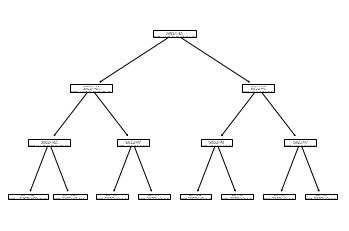

In [26]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['self_actualization', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'emotional_flex', 
             'balanced_life',
             'trauma',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['self_actualization'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler

# define a new scaler: 
x_scaler = StandardScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_17 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_17.fit(X_train, y_train)


y_pred = model_17.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_17)

##### MinMax Scaler

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 6 5
 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        39
           5       0.29      0.98      0.44        47
           6       0.75      0.08      0.14        38

    accuracy                           0.30       166
   macro avg       0.15      0.15      0.08       166
weighted avg       0.25      0.30      0.16       166

Confusion Matrix: 
 [[ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  7  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(167.4, 190.26, 'X[265] <= 0.5\ngini = 0.781\nsamples = 385\nvalue = [2, 15, 27, 52, 100, 117, 72]'),
 Text(83.7, 135.9, 'X[200] <= 0.5\ngini = 0.784\nsamples = 372\nvalue = [2, 15, 27, 52, 99, 108, 69]'),
 Text(41.85, 81.53999999999999, 'X[230] <= 0.5\ngini = 0.781\nsamples = 368\nvalue = [2, 15, 24, 52, 99, 108, 68]'),
 Text(20.925, 27.180000000000007, 'gini = 0.785\nsamples = 343\nvalue = [1, 15, 23, 52, 94, 95, 63]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.646\nsamples = 25\nvalue = [1, 0, 1, 0, 5, 13, 5]'),
 Text(125.55000000000001, 81.53999999999999, 'X[6] <= 0.679\ngini = 0.375\nsamples = 4\nvalue = [0, 0, 3, 0, 0, 0, 1]'),
 Text(104.625, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 1]'),
 Text(146.475, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0, 0, 0]'),
 Text(251.10000000000002, 135.9, 'X[5] <= 0.03\ngini = 0.462\nsamples = 13\nvalue = [0, 0, 0, 0, 1, 9, 3]'),
 Text(209.25, 81.53999999999999, 'X[305] <

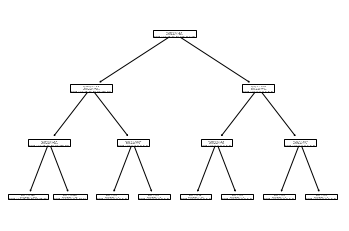

In [27]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['self_actualization', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'emotional_flex', 
             'balanced_life',
             'trauma',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['self_actualization'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_18 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_18.fit(X_train, y_train)


y_pred = model_18.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_18)

##### Function Transformer

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 5 5 5 5 5 5 5 5 5 5 2 5
 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        39
           5       0.29      0.98      0.44        47
           6       1.00      0.05      0.10        38

    accuracy                           0.29       166
   macro avg       0.18      0.15      0.08       166
weighted avg       0.31      0.29      0.15       166

Confusion Matrix: 
 [[ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  7  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(167.4, 190.26, 'X[265] <= 0.5\ngini = 0.781\nsamples = 385\nvalue = [2, 15, 27, 52, 100, 117, 72]'),
 Text(83.7, 135.9, 'X[200] <= 0.5\ngini = 0.784\nsamples = 372\nvalue = [2, 15, 27, 52, 99, 108, 69]'),
 Text(41.85, 81.53999999999999, 'X[230] <= 0.5\ngini = 0.781\nsamples = 368\nvalue = [2, 15, 24, 52, 99, 108, 68]'),
 Text(20.925, 27.180000000000007, 'gini = 0.785\nsamples = 343\nvalue = [1, 15, 23, 52, 94, 95, 63]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.646\nsamples = 25\nvalue = [1, 0, 1, 0, 5, 13, 5]'),
 Text(125.55000000000001, 81.53999999999999, 'X[5] <= 0.457\ngini = 0.375\nsamples = 4\nvalue = [0, 0, 3, 0, 0, 0, 1]'),
 Text(104.625, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0, 0, 0]'),
 Text(146.475, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 1]'),
 Text(251.10000000000002, 135.9, 'X[5] <= 0.03\ngini = 0.462\nsamples = 13\nvalue = [0, 0, 0, 0, 1, 9, 3]'),
 Text(209.25, 81.53999999999999, 'X[234] <

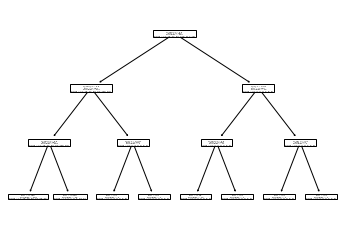

In [28]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['self_actualization', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'emotional_flex', 
             'balanced_life',
             'trauma',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['self_actualization'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer

# define a new scaler: 
x_scaler = FunctionTransformer()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_19 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

# Training model
model_19.fit(X_train, y_train)


y_pred = model_19.predict(X_test) # Predicting labels for our test set using model
print(y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

tree.plot_tree(model_19)

## Ensemble Classifier

### Predict trauma

#### Standard Scaler

In [29]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['trauma', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['trauma'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler

# define a new scaler: 
x_scaler = StandardScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

from sklearn.ensemble import AdaBoostClassifier
model_1a = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters
model_1a.fit(X_train_norm, y_train) # Training the model

y_pred = model_1a.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       104
           1       0.53      0.45      0.49        62

    accuracy                           0.64       166
   macro avg       0.61      0.61      0.61       166
weighted avg       0.64      0.64      0.64       166

Confusion Matrix: 
 [[79 25]
 [34 28]]


#### MinMax Scaler

In [30]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['trauma', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['trauma'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

from sklearn.ensemble import AdaBoostClassifier
model_2a = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters
model_2a.fit(X_train_norm, y_train) # Training the model

y_pred = model_2a.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.69      0.74      0.72       104
           1       0.51      0.45      0.48        62

    accuracy                           0.63       166
   macro avg       0.60      0.60      0.60       166
weighted avg       0.62      0.63      0.63       166

Confusion Matrix: 
 [[77 27]
 [34 28]]


#### Function Transformer

In [31]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['trauma', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['trauma'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer

# define a new scaler: 
x_scaler = FunctionTransformer()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

from sklearn.ensemble import AdaBoostClassifier
model_3a = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters
model_3a.fit(X_train_norm, y_train) # Training the model

y_pred = model_3a.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.69      0.74      0.72       104
           1       0.51      0.45      0.48        62

    accuracy                           0.63       166
   macro avg       0.60      0.60      0.60       166
weighted avg       0.62      0.63      0.63       166

Confusion Matrix: 
 [[77 27]
 [34 28]]


### Predict specific mental health indicators

##### Life Enjoyment

###### Standard Scaler

In [32]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['life_enjoyment', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['life_enjoyment'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler

# define a new scaler: 
x_scaler = StandardScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

from sklearn.ensemble import AdaBoostClassifier
model_4a = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters
model_4a.fit(X_train_norm, y_train) # Training the model

y_pred = model_4a.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.25      0.27      0.26        11
           2       0.11      0.04      0.05        28
           3       0.25      0.31      0.28        48
           4       0.20      0.22      0.21        36
           5       0.08      0.12      0.09        26
           6       0.20      0.08      0.12        12

    accuracy                           0.19       166
   macro avg       0.15      0.15      0.14       166
weighted avg       0.18      0.19      0.17       166

Confusion Matrix: 
 [[ 0  1  0  2  2  0  0]
 [ 0  3  1  4  1  2  0]
 [ 0  3  1  9  5  9  1]
 [ 0  4  4 15 12 12  1]
 [ 0  0  1 17  8  9  1]
 [ 0  1  1  9 11  3  1]
 [ 0  0  1  5  2  3  1]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### MinMax Scaler

In [33]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['life_enjoyment', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['life_enjoyment'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

from sklearn.ensemble import AdaBoostClassifier
model_5a = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters
model_5a.fit(X_train_norm, y_train) # Training the model

y_pred = model_5a.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.23      0.27      0.25        11
           2       0.11      0.04      0.05        28
           3       0.25      0.31      0.28        48
           4       0.20      0.22      0.21        36
           5       0.05      0.08      0.06        26
           6       0.20      0.08      0.12        12

    accuracy                           0.18       166
   macro avg       0.15      0.14      0.14       166
weighted avg       0.17      0.18      0.17       166

Confusion Matrix: 
 [[ 0  1  0  2  2  0  0]
 [ 0  3  1  4  1  2  0]
 [ 0  3  1  9  5  9  1]
 [ 0  4  4 15 12 12  1]
 [ 0  0  1 17  8  9  1]
 [ 0  2  1  9 11  2  1]
 [ 0  0  1  5  2  3  1]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### Function Transformer

In [34]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['life_enjoyment', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['life_enjoyment'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer

# define a new scaler: 
x_scaler = FunctionTransformer()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

from sklearn.ensemble import AdaBoostClassifier
model_6a = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters
model_6a.fit(X_train_norm, y_train) # Training the model

y_pred = model_6a.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.23      0.27      0.25        11
           2       0.11      0.04      0.05        28
           3       0.25      0.31      0.28        48
           4       0.20      0.22      0.21        36
           5       0.05      0.08      0.06        26
           6       0.20      0.08      0.12        12

    accuracy                           0.18       166
   macro avg       0.15      0.14      0.14       166
weighted avg       0.17      0.18      0.17       166

Confusion Matrix: 
 [[ 0  1  0  2  2  0  0]
 [ 0  3  1  4  1  2  0]
 [ 0  3  1  9  5  9  1]
 [ 0  4  4 15 12 12  1]
 [ 0  0  1 17  8  9  1]
 [ 0  2  1  9 11  2  1]
 [ 0  0  1  5  2  3  1]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Resilience

###### Standard Scaler

In [35]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['resilience'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler

# define a new scaler: 
x_scaler = StandardScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

from sklearn.ensemble import AdaBoostClassifier
model_7a = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters
model_7a.fit(X_train_norm, y_train) # Training the model

y_pred = model_7a.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.17      0.06      0.08        18
           3       0.33      0.04      0.08        23
           4       0.37      0.70      0.49        47
           5       0.32      0.27      0.29        49
           6       0.19      0.15      0.17        26

    accuracy                           0.31       166
   macro avg       0.20      0.17      0.16       166
weighted avg       0.29      0.31      0.27       166

Confusion Matrix: 
 [[ 0  0  0  0  0  0  1]
 [ 0  0  0  0  1  1  0]
 [ 0  0  1  0  9  5  3]
 [ 0  1  2  1 13  6  0]
 [ 0  1  1  0 33 10  2]
 [ 0  4  1  1 19 13 11]
 [ 0  0  1  1 14  6  4]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### MinMax Scaler

In [36]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['resilience'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

from sklearn.ensemble import AdaBoostClassifier
model_8a = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters
model_8a.fit(X_train_norm, y_train) # Training the model

y_pred = model_8a.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.20      0.06      0.09        18
           3       0.25      0.04      0.07        23
           4       0.37      0.70      0.49        47
           5       0.30      0.24      0.27        49
           6       0.23      0.19      0.21        26

    accuracy                           0.31       166
   macro avg       0.19      0.18      0.16       166
weighted avg       0.29      0.31      0.27       166

Confusion Matrix: 
 [[ 0  0  0  0  0  0  1]
 [ 0  0  0  0  1  1  0]
 [ 0  0  1  0  9  5  3]
 [ 0  1  2  1 13  6  0]
 [ 0  1  1  0 33 10  2]
 [ 0  4  1  2 19 12 11]
 [ 0  0  0  1 14  6  5]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### Function Transformer

In [37]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['resilience'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer

# define a new scaler: 
x_scaler = FunctionTransformer()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

from sklearn.ensemble import AdaBoostClassifier
model_9a = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters
model_9a.fit(X_train_norm, y_train) # Training the model

y_pred = model_9a.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.22      0.11      0.15        18
           3       0.33      0.04      0.08        23
           4       0.37      0.68      0.48        47
           5       0.32      0.27      0.29        49
           6       0.19      0.15      0.17        26

    accuracy                           0.31       166
   macro avg       0.21      0.18      0.17       166
weighted avg       0.30      0.31      0.27       166

Confusion Matrix: 
 [[ 0  0  0  0  0  0  1]
 [ 0  0  0  0  1  1  0]
 [ 0  0  2  0  9  4  3]
 [ 0  1  3  1 12  6  0]
 [ 0  1  2  0 32 10  2]
 [ 0  4  1  1 19 13 11]
 [ 0  0  1  1 13  7  4]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Balanced Life

##### Standard Scaler

In [38]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['balanced_life', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'resilience', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['balanced_life'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler

# define a new scaler: 
x_scaler = StandardScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

from sklearn.ensemble import AdaBoostClassifier
model_10a = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters
model_10a.fit(X_train_norm, y_train) # Training the model

y_pred = model_10a.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        36
           3       0.21      0.19      0.20        36
           4       0.19      0.66      0.29        32
           5       1.00      0.03      0.05        38
           6       0.00      0.00      0.00        16

    accuracy                           0.17       166
   macro avg       0.20      0.13      0.08       166
weighted avg       0.31      0.17      0.11       166

Confusion Matrix: 
 [[ 0  0  2  0  0  0  0]
 [ 0  0  1  2  3  0  0]
 [ 0  1  0 13 22  0  0]
 [ 0  2  1  7 24  0  2]
 [ 0  2  4  5 21  0  0]
 [ 0  0  2  4 31  1  0]
 [ 1  2  1  2 10  0  0]]


##### MinMax Scaler

In [39]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['balanced_life', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'resilience', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['balanced_life'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

from sklearn.ensemble import AdaBoostClassifier
model_11a = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters
model_11a.fit(X_train_norm, y_train) # Training the model

y_pred = model_11a.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         6
           2       0.15      0.06      0.08        36
           3       0.22      0.17      0.19        36
           4       0.18      0.59      0.27        32
           5       0.12      0.03      0.04        38
           6       0.00      0.00      0.00        16

    accuracy                           0.17       166
   macro avg       0.10      0.12      0.08       166
weighted avg       0.14      0.17      0.12       166

Confusion Matrix: 
 [[ 0  0  2  0  0  0  0]
 [ 0  0  1  2  3  0  0]
 [ 0  1  2  7 21  4  1]
 [ 0  2  1  6 23  2  2]
 [ 0  2  4  6 19  1  0]
 [ 0  0  2  4 31  1  0]
 [ 1  2  1  2 10  0  0]]


##### Function Transformer

In [40]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['balanced_life', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'resilience', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['balanced_life'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer

# define a new scaler: 
x_scaler = FunctionTransformer()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

from sklearn.ensemble import AdaBoostClassifier
model_12a = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters
model_12a.fit(X_train_norm, y_train) # Training the model

y_pred = model_12a.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined functio

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        36
           3       0.21      0.19      0.20        36
           4       0.19      0.66      0.29        32
           5       1.00      0.03      0.05        38
           6       0.00      0.00      0.00        16

    accuracy                           0.17       166
   macro avg       0.20      0.13      0.08       166
weighted avg       0.31      0.17      0.11       166

Confusion Matrix: 
 [[ 0  0  2  0  0  0  0]
 [ 0  0  1  2  3  0  0]
 [ 0  1  0 13 22  0  0]
 [ 0  2  1  7 24  0  2]
 [ 0  2  4  5 21  0  0]
 [ 0  0  2  4 31  1  0]
 [ 1  2  1  2 10  0  0]]


#### Emotional Flexibility

##### Standard Scaler

In [41]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['emotional_flex', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['emotional_flex'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler

# define a new scaler: 
x_scaler = StandardScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

from sklearn.ensemble import AdaBoostClassifier
model_13a = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters
model_13a.fit(X_train_norm, y_train) # Training the model

y_pred = model_13a.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        11
           2       0.27      0.11      0.15        28
           3       0.18      0.25      0.21        24
           4       0.32      0.39      0.35        38
           5       0.29      0.50      0.36        36
           6       0.00      0.00      0.00        24

    accuracy                           0.25       166
   macro avg       0.15      0.18      0.15       166
weighted avg       0.21      0.25      0.22       166

Confusion Matrix: 
 [[ 0  0  0  1  1  3  0]
 [ 0  0  0  3  3  5  0]
 [ 1  0  3  5  6 10  3]
 [ 1  0  2  6  9  6  0]
 [ 0  0  2  7 15 13  1]
 [ 1  2  0  5  9 18  1]
 [ 1  0  4  7  4  8  0]]


##### MinMax Scaler

In [42]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['emotional_flex', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['emotional_flex'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

from sklearn.ensemble import AdaBoostClassifier
model_14a = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters
model_14a.fit(X_train_norm, y_train) # Training the model

y_pred = model_14a.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        11
           2       0.27      0.11      0.15        28
           3       0.18      0.25      0.21        24
           4       0.32      0.39      0.35        38
           5       0.29      0.50      0.36        36
           6       0.00      0.00      0.00        24

    accuracy                           0.25       166
   macro avg       0.15      0.18      0.15       166
weighted avg       0.21      0.25      0.22       166

Confusion Matrix: 
 [[ 0  0  0  1  1  3  0]
 [ 0  0  0  3  3  5  0]
 [ 1  0  3  5  6 10  3]
 [ 1  0  2  6  9  6  0]
 [ 0  0  2  7 15 13  1]
 [ 1  2  0  5  9 18  1]
 [ 1  0  4  7  4  8  0]]


##### Function Transformer

In [43]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['emotional_flex', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['emotional_flex'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer

# define a new scaler: 
x_scaler = FunctionTransformer()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

from sklearn.ensemble import AdaBoostClassifier
model_15a = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters
model_15a.fit(X_train_norm, y_train) # Training the model

y_pred = model_15a.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        11
           2       0.27      0.11      0.15        28
           3       0.18      0.25      0.21        24
           4       0.32      0.39      0.35        38
           5       0.29      0.50      0.36        36
           6       0.00      0.00      0.00        24

    accuracy                           0.25       166
   macro avg       0.15      0.18      0.15       166
weighted avg       0.21      0.25      0.22       166

Confusion Matrix: 
 [[ 0  0  0  1  1  3  0]
 [ 0  0  0  3  3  5  0]
 [ 1  0  3  5  6 10  3]
 [ 1  0  2  6  9  6  0]
 [ 0  0  2  7 15 13  1]
 [ 1  2  0  5  9 18  1]
 [ 1  0  4  7  4  8  0]]


#### Self Actualization

##### Standard Scaler

In [44]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['self_actualization', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['self_actualization'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler

# define a new scaler: 
x_scaler = StandardScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

from sklearn.ensemble import AdaBoostClassifier
model_16a = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters
model_16a.fit(X_train_norm, y_train) # Training the model

y_pred = model_16a.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         7
           2       0.11      0.08      0.10        12
           3       0.00      0.00      0.00        20
           4       0.53      0.23      0.32        39
           5       0.23      0.34      0.28        47
           6       0.13      0.18      0.16        38

    accuracy                           0.20       166
   macro avg       0.14      0.12      0.12       166
weighted avg       0.23      0.20      0.20       166

Confusion Matrix: 
 [[ 0  0  0  0  0  1  2]
 [ 0  0  0  0  2  1  4]
 [ 0  2  1  1  1  4  3]
 [ 0  1  1  0  1 11  6]
 [ 0  3  1  1  9 16  9]
 [ 0  4  2  1  3 16 21]
 [ 0  4  4  2  1 20  7]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### MinMax Scaler

In [45]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['self_actualization', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['self_actualization'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

from sklearn.ensemble import AdaBoostClassifier
model_17a = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters
model_17a.fit(X_train_norm, y_train) # Training the model

y_pred = model_17a.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         7
           2       0.12      0.08      0.10        12
           3       0.00      0.00      0.00        20
           4       0.41      0.23      0.30        39
           5       0.25      0.34      0.29        47
           6       0.13      0.18      0.16        38

    accuracy                           0.20       166
   macro avg       0.13      0.12      0.12       166
weighted avg       0.21      0.20      0.19       166

Confusion Matrix: 
 [[ 0  0  0  0  0  1  2]
 [ 0  0  0  0  1  2  4]
 [ 0  2  1  1  2  3  3]
 [ 0  1  0  0  3 10  6]
 [ 0  3  1  1  9 16  9]
 [ 0  4  2  1  3 16 21]
 [ 0  4  4  2  4 17  7]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Function Transformer

In [46]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['self_actualization', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['self_actualization'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer

# define a new scaler: 
x_scaler = FunctionTransformer()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

from sklearn.ensemble import AdaBoostClassifier
model_18a = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters
model_18a.fit(X_train_norm, y_train) # Training the model

y_pred = model_18a.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         7
           2       0.11      0.08      0.10        12
           3       0.00      0.00      0.00        20
           4       0.47      0.23      0.31        39
           5       0.21      0.30      0.25        47
           6       0.13      0.18      0.16        38

    accuracy                           0.19       166
   macro avg       0.13      0.11      0.12       166
weighted avg       0.21      0.19      0.19       166

Confusion Matrix: 
 [[ 0  0  0  0  0  1  2]
 [ 0  0  0  0  2  1  4]
 [ 0  2  1  1  0  5  3]
 [ 0  1  1  0  1 11  6]
 [ 0  3  1  1  9 16  9]
 [ 0  4  2  1  5 14 21]
 [ 0  4  4  3  2 18  7]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Ridge Regression

### Predict total health score

#### Standard Scaler

In [47]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['trauma', 
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health', # y
             'genres'],
            axis = 1),
            data['total_health'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', StandardScaler()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

39.85556805447666


#### PCA

In [48]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['trauma', 
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health', # y
             'genres'],
            axis = 1),
            data['total_health'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', PCA()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

28.89091183149181


#### MinMax Scaler

In [49]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['trauma', 
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health', # y
             'genres'],
            axis = 1),
            data['total_health'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', MinMaxScaler()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

28.872433480697115


#### Function Transformer

In [50]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['trauma', 
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health', # y
             'genres'],
            axis = 1),
            data['total_health'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', FunctionTransformer()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

28.890911831481297


### Predict trauma

##### Standard Scaler

In [51]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['trauma', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['trauma'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', StandardScaler()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

0.3877051481287812


##### PCA

In [52]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['trauma', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['trauma'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('pca', PCA()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

0.2526202314998527


##### MinMax Scaler

In [53]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['trauma', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['trauma'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', MinMaxScaler()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

0.25298568391452236


##### Function Transformer

In [54]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['trauma', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['trauma'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', FunctionTransformer()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

0.25262023149889656


### Preduct specific mental health indicators

#### Life Enjoyment

##### Standard Scaler

In [55]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['life_enjoyment', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['life_enjoyment'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', StandardScaler()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

3.350276149577869


##### PCA

In [56]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['life_enjoyment', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['life_enjoyment'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('pca', PCA()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.1961130755086984


##### MinMax Scaler

In [57]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['life_enjoyment', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['life_enjoyment'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', MinMaxScaler()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.1950032871191465


##### Function Transformer

In [58]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['life_enjoyment', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['life_enjoyment'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', FunctionTransformer()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.1961130755026437


#### Resilience

##### Standard Scaler

In [59]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['resilience'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', StandardScaler()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.5483162995143633


##### PCA

In [60]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['resilience'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('pca', PCA()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

1.7876853308083973


##### MinMax Scaler

In [61]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['resilience'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', MinMaxScaler()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

1.7880077955638627


##### Function Transformer

In [62]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['resilience'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', FunctionTransformer()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

1.787685330806692


#### Balanced Life

##### Standard Scaler

In [63]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['balanced_life', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'resilience', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['balanced_life'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', StandardScaler()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

3.718031491794366


##### PCA

In [64]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['balanced_life', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'resilience', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['balanced_life'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('pca', PCA()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.2844670463159575


##### MinMax Scaler

In [65]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['balanced_life', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'resilience', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['balanced_life'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', MinMaxScaler()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.284386053081449


##### Function Transformer

In [66]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['balanced_life', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'resilience', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['balanced_life'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', FunctionTransformer()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.2844670463106755


#### Emotional Flexibility

##### Standard Scaler

In [67]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['emotional_flex', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['emotional_flex'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', StandardScaler()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

4.080889251936879


##### PCA

In [68]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['emotional_flex', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['emotional_flex'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('pca', PCA()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.8162087725502647


##### MinMax Scaler

In [69]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['emotional_flex', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['emotional_flex'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', MinMaxScaler()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.8094069935216024


##### Function Transformer

In [70]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['emotional_flex', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['emotional_flex'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', FunctionTransformer()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.816208772549627


#### Self Actualization

##### Standard Scaler

In [71]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['self_actualization', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['self_actualization'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', StandardScaler()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

4.170529757744025


##### PCA

In [72]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['self_actualization', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['self_actualization'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('pca', PCA()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.4778308064750285


##### MinMax Scaler

In [73]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['self_actualization', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['self_actualization'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', MinMaxScaler()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.478309942976805


##### Function Transformer

In [74]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['self_actualization', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['self_actualization'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', FunctionTransformer()),
                 ('reg', Ridge())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.4778308064770473


## Lasso Regression

### Predict total health score

#### Standard Scaler

In [75]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['trauma', 
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health', # y
             'genres'],
            axis = 1),
            data['total_health'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', StandardScaler()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

27.35078753197983


#### PCA

In [76]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['trauma', 
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health', # y
             'genres'],
            axis = 1),
            data['total_health'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', PCA()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

27.355032908426953


#### MinMax Scaler

In [77]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['trauma', 
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health', # y
             'genres'],
            axis = 1),
            data['total_health'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', MinMaxScaler()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

27.35078753197983


#### Function Transformer

In [78]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['trauma', 
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health', # y
             'genres'],
            axis = 1),
            data['total_health'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', FunctionTransformer()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

27.35347919891419


### Predict trauma

##### Standard Scaler

In [79]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['trauma', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['trauma'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', StandardScaler()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

0.23456784804930633


##### PCA

In [80]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['trauma', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['trauma'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('pca', PCA()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

0.23456784804930633


##### MinMax Scaler

In [81]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['trauma', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['trauma'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', MinMaxScaler()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

0.23456784804930633


##### Function Transformer

In [82]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['trauma', # y
             'gender', 
             'age', 
             'amount_music',
             'life_enjoyment', 
             'resilience', 
             'balanced_life', 
             'emotional_flex', 
             'self_actualization',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['trauma'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', FunctionTransformer()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

0.23456784804930633


### Predict specific mental health indicators

#### Life Enjoyment

##### Standard Scaler

In [83]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['life_enjoyment', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'self_actualization', 
             'resilience', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['life_enjoyment'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', StandardScaler()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.0727004899340993


##### PCA

In [84]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['life_enjoyment', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'self_actualization', 
             'resilience', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['life_enjoyment'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('pca', PCA()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.072020319766609


##### MinMax Scaler

In [85]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['life_enjoyment', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'self_actualization', 
             'resilience', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['life_enjoyment'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', MinMaxScaler()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.0727004899340993


##### Function Transformer

In [86]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['life_enjoyment', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'self_actualization', 
             'resilience', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['life_enjoyment'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', FunctionTransformer()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.0720403917938226


#### Resilience

##### Standard Scaler

In [87]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'self_actualization', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['resilience'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', StandardScaler()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

1.7657318428715707


##### PCA

In [88]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'self_actualization', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['resilience'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('pca', PCA()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

1.76584740476252


##### MinMax Scaler

In [89]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'self_actualization', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['resilience'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', MinMaxScaler()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

1.7657318428715707


##### Function Transformer

In [90]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'self_actualization', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['resilience'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', FunctionTransformer()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

1.7652419457632227


#### Balanced Life

##### Standard Scaler

In [91]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'self_actualization', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['balanced_life'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', StandardScaler()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.072986159514089


##### PCA

In [92]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'self_actualization', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['balanced_life'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('pca', PCA()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.0657768032801163


##### MinMax Scaler

In [93]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'self_actualization', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['balanced_life'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', MinMaxScaler()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.072986159514089


##### Function Transformer

In [94]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'self_actualization', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['balanced_life'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', FunctionTransformer()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.0643974521508404


#### Emotional Flexibility

##### Standard Scaler

In [95]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'self_actualization', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['emotional_flex'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', StandardScaler()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.6220736140717364


##### PCA

In [96]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'self_actualization', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['emotional_flex'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('pcs', PCA()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.622386234530986


##### MinMax Scaler

In [97]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'self_actualization', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['emotional_flex'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', MinMaxScaler()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.6220736140717364


##### Function Transformer

In [98]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'self_actualization', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['emotional_flex'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', FunctionTransformer()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.622462491110615


#### Self Actualization

##### Standard Scaler

In [99]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'self_actualization', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['self_actualization'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', StandardScaler()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.2004675405958465


##### PCA

In [100]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'self_actualization', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['self_actualization'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('pca', PCA()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.1967967245261284


##### MinMax Scaler

In [101]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'self_actualization', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['self_actualization'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', MinMaxScaler()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.2004675405958465


##### Function Transformer

In [102]:
# training and test split
from sklearn.model_selection import train_test_split

# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 

X_train, X_test, y_train, y_test = train_test_split(data.drop(['resilience', # y
             'gender', 
             'age', 
             'amount_music',
             'trauma', 
             'self_actualization', 
             'life_enjoyment', 
             'balanced_life', 
             'emotional_flex',
             'health_categorical',
             'total_health',
             'genres'],
            axis = 1),
            data['self_actualization'], # y to be predicted
            test_size=0.3,
            random_state=0) 

from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

featurepipe = Pipeline([('scaler', FunctionTransformer()),
                 ('reg', Lasso())])

featurepipe.fit(X_train, y_train)
predicted = featurepipe.predict(X_test)

# print MSE
from sklearn.metrics import accuracy_score, mean_squared_error

print(mean_squared_error(y_test, predicted))

2.1965349138581005
